<a href="https://colab.research.google.com/github/fhaarn/Diamond-dataset-EDA/blob/main/Diamonds_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deskripsi Dataset

Objective : Menganalisa harga berlian berdasarkan fitur-fitur seperti karat, potongan, warna, kejernihan, dan ukuran.
<br>


*   **carat** (karat) : ukuran berat berlian. Satu karat setara dengan 0,2 gram
*   **clarity** (kejernihan) : kejernihan mengacu pada seberapa jernihnya sebuah berlian. Berlian sering kali mengandung ketidaksempurnaan seperti retakan atau endapan mineral. Semakin sedikit dan semakin tidak terlihat ketidaksempurnaan berlian, semakin baik kejernihannya. kejernihan terdiri dari 8 tingkat yang diurutkan, dari "I1" (terburuk) hingga "IF" (terbaik).
*   **color** (warna) : warna mengacu pada warna berlian. Berlian yang tidak berwarna dianggap lebih baik daripada berlian dengan warna kuning. berlian terdiri dari 7 warna yang berbeda, yang diwakili oleh huruf yang berbeda. Berlian "D" - "F" dianggap tidak berwarna, sedangkan berlian "G" - "J" memiliki warna yang sangat samar.
*   **cut** (potongan) : potongan mengacu pada bagaimana berlian kasar dibentuk menjadi berlian jadi. Potongan yang lebih baik menghasilkan berlian yang lebih simetris dan bercahaya. potongan memiliki 5 tingkatan: "Wajar," "Baik," "Sangat Baik," "Premium," "Ideal."
*  **x, y, z, kedalaman, dan tabel** adalah berbagai ukuran ukuran berlian, dalam milimeter.
*  **price** : Harga berlian







## Data Prep

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
# read dataset
df = pd.read_csv("/content/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
print("Duplikat :",df.duplicated().sum())
print("Nilai Null :")
print(pd.isnull(df).sum())

Duplikat : 146
Nilai Null :
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
print("Duplikat :",df.duplicated().sum())

Duplikat : 0


In [8]:
df['cut'].unique()
cut_encoding = {'Ideal' : 0, 'Premium' : 1, 'Good' : 3, 'Very Good' :2, 'Fair' : 4}

In [9]:
df['color'].unique()
color_encoding = {'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6}

In [10]:
df['clarity'].unique()
clarity_encoding = {'IF':0,'VVS1':1,'VVS2':2,'VS1':3,'VS2':4,'SI1':5,'SI2':6, 'I1':7}

## Data Visualisation

In [11]:
df_numeric = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
df_category = ['cut', 'color', 'clarity']

[Text(0, 0, '1598'),
 Text(0, 0, '4891'),
 Text(0, 0, '12069'),
 Text(0, 0, '13748'),
 Text(0, 0, '21488')]

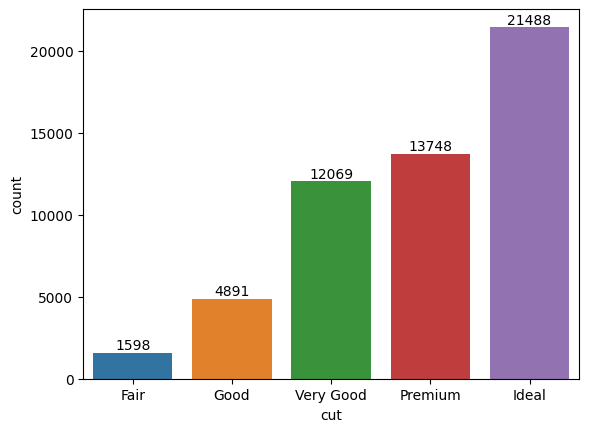

In [12]:
# From Worst to Best (Fair= Worst) ,(Ideal= Best)
ax = sns.countplot(x= "cut", data= df, order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
ax.bar_label(ax.containers[0])

In [13]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

[Text(0, 0, '6755'),
 Text(0, 0, '9776'),
 Text(0, 0, '9520'),
 Text(0, 0, '11262'),
 Text(0, 0, '8272'),
 Text(0, 0, '5407'),
 Text(0, 0, '2802')]

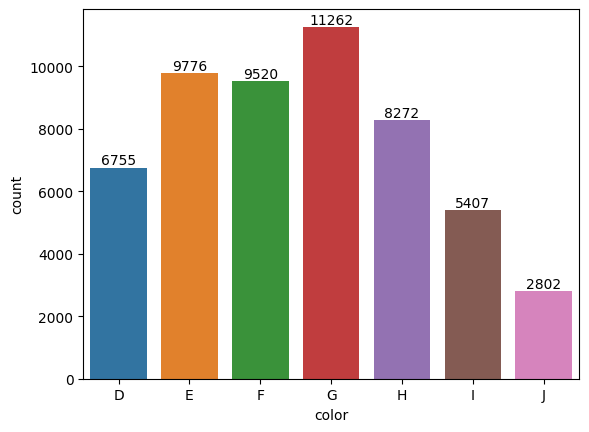

In [14]:
# From Best to Worst (Best = D - F), (Worst = G - J)
ax = sns.countplot(x= "color", data= df, order=["D", "E", "F", "G", "H", "I", "J"])
ax.bar_label(ax.containers[0])

[Text(0, 0, '1784'),
 Text(0, 0, '3647'),
 Text(0, 0, '5056'),
 Text(0, 0, '8156'),
 Text(0, 0, '12229'),
 Text(0, 0, '13032'),
 Text(0, 0, '9150'),
 Text(0, 0, '740')]

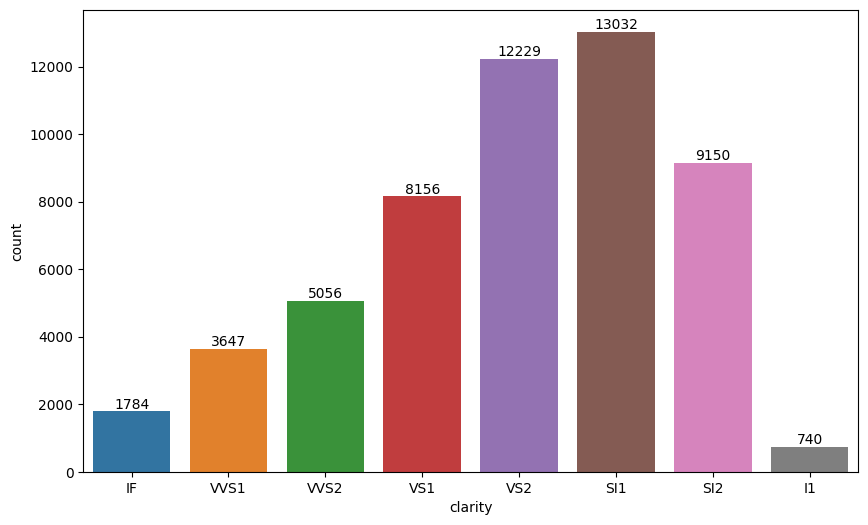

In [15]:
# From Best to Worst (Best = FL - IF), (Moderate = VVS1 - SI2), (Worst= I1 - I3)
plt.figure(figsize= (10, 6))
ax = sns.countplot( x= "clarity", data= df, order=[ "IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1" ] )
ax.bar_label(ax.containers[0])

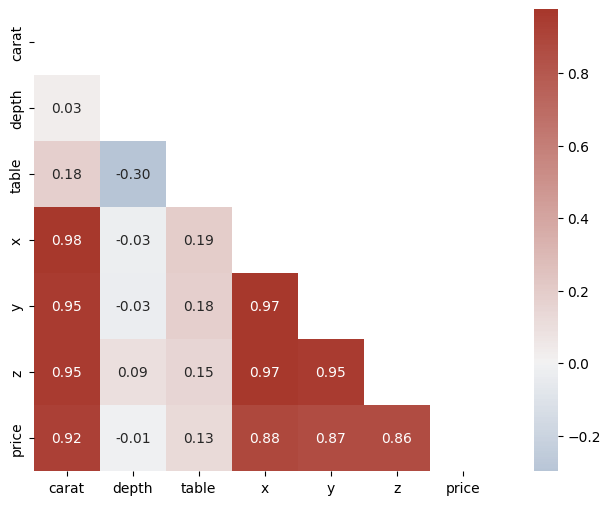

In [16]:
# menampilkan korelasi
diamond_corr = df[df_numeric].corr()
mask = np.triu(np.ones_like(diamond_corr, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(10, 6))
sns.heatmap(diamond_corr, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
plt.show()

In [103]:
cols = ['cut','color','clarity']
encd = [cut_encoding,color_encoding,clarity_encoding]
df_encoded = df.copy()
for i in range(len(cols)):
  df_encoded = df_encoded.replace({cols[i]: encd[i]})

In [105]:
df_encoded.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,6,63.3,58.0,335,4.34,4.35,2.75


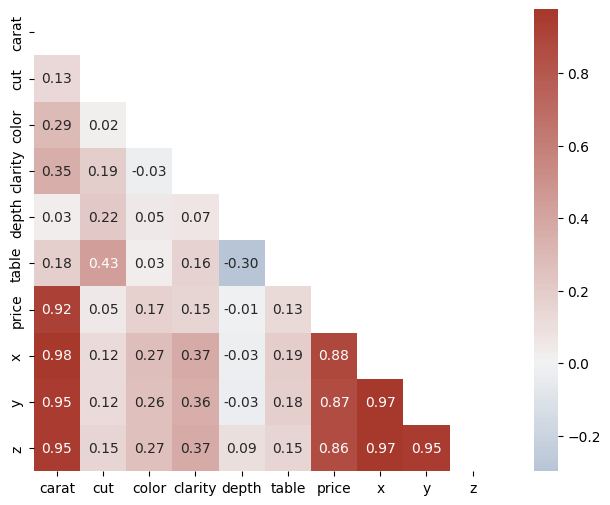

In [106]:
# menampilkan korelasi
diamond_corr = df_encoded.corr()
mask = np.triu(np.ones_like(diamond_corr, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(10, 6))
sns.heatmap(diamond_corr, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
plt.show()

In [107]:
from scipy.stats import pointbiserialr
from scipy.stats import spearmanr
from scipy.stats import kruskal

In [108]:
# for i in cols:
#   correlation_coefficient, p_value = pointbiserialr(df['price'], df[i])
#   print(f"Feature : {i} || Correlation Coefficient : {correlation_coefficient}")

In [109]:
for i in cols:
  correlation_coefficient, p_value = spearmanr(df['price'], df[i])
  print(f"Feature : {i} || Correlation Coefficient : {correlation_coefficient}")

Feature : cut || Correlation Coefficient : 0.03822295498896473
Feature : color || Correlation Coefficient : 0.14967275029739066
Feature : clarity || Correlation Coefficient : -0.11590308446827667


In [110]:
df_numeric

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

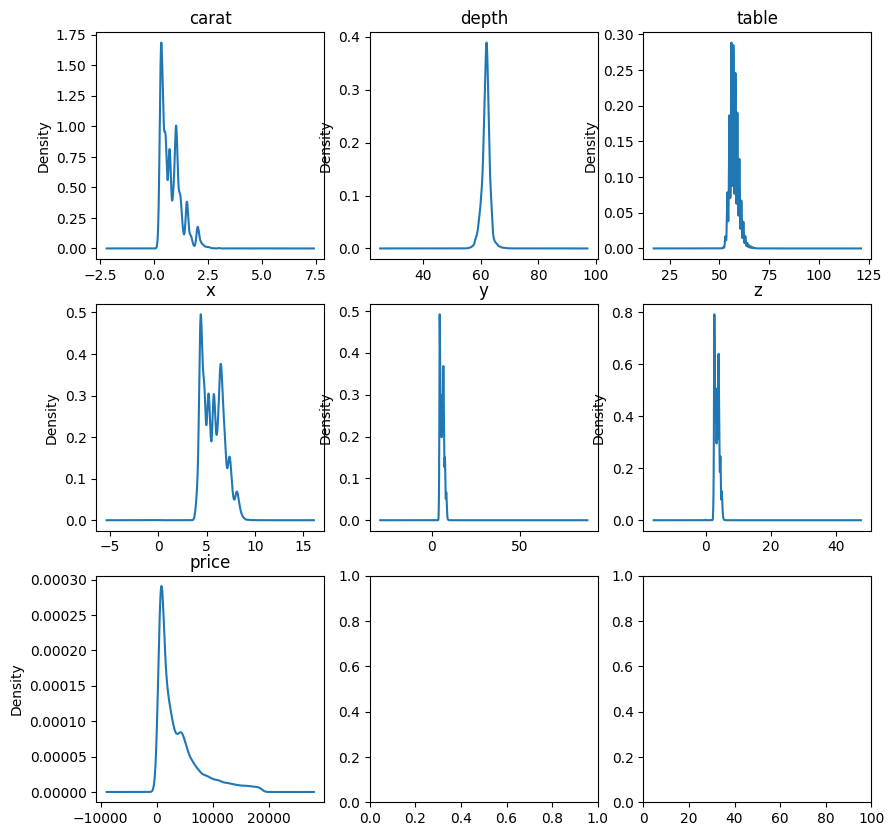

In [111]:
fig, ax = plt.subplots(3,3,figsize=(10,10))
row = col = 0
for n,i in enumerate(df_numeric):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    # end if
    df[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1
# end for
plt.xlim( [0, 100] )
plt.show()

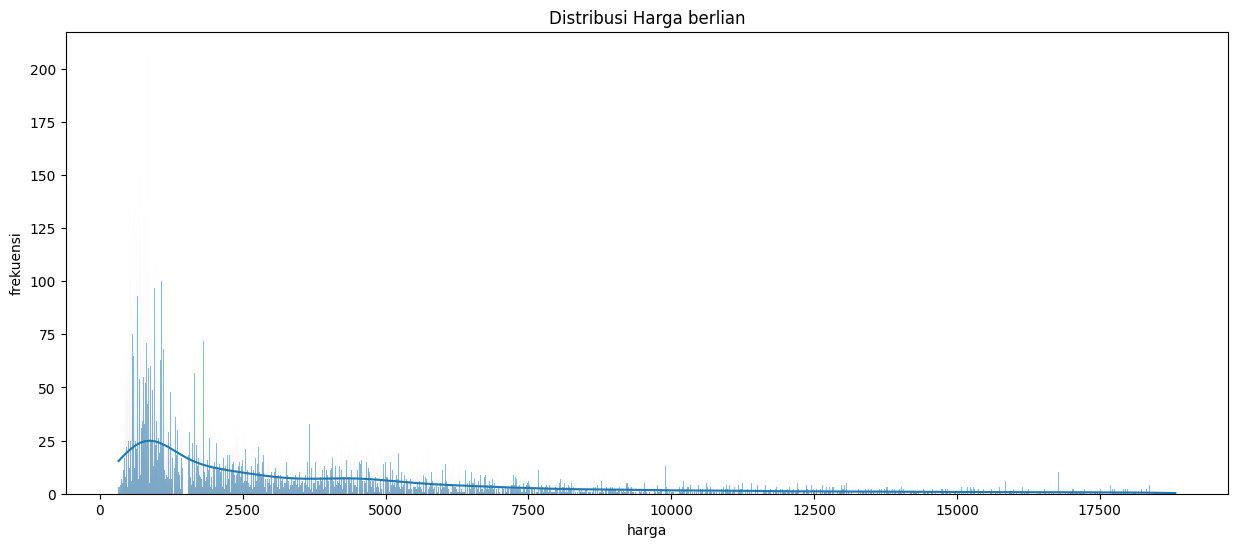

In [112]:
plt.figure( figsize=(15,6) )
sns.histplot( df['price'], bins=11602, kde=True )
plt.title('Distribusi Harga berlian')
plt.xlabel('harga')
plt.ylabel('frekuensi')
plt.show()

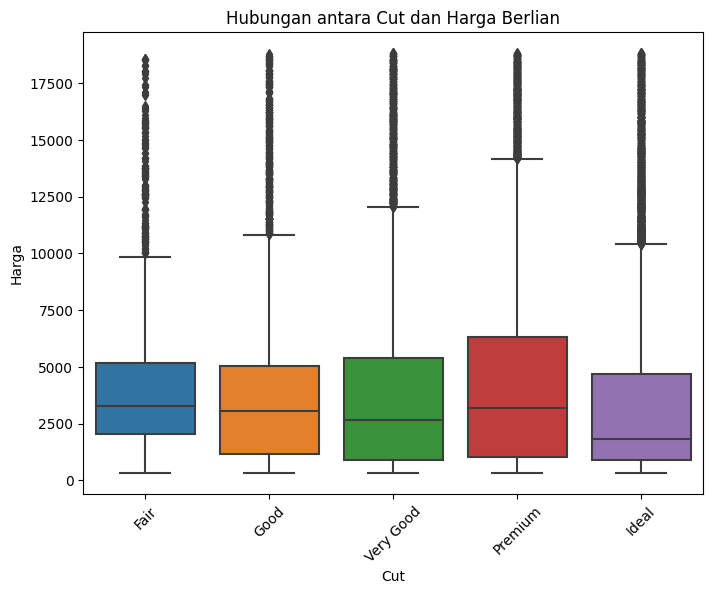

In [113]:
# Visualisasi hubungan antara cut dan harga
plt.figure(figsize=(8, 6))
sns.boxplot( data=df, x='cut', y='price', order=["Fair", "Good", "Very Good", "Premium", "Ideal"] )
plt.title('Hubungan antara Cut dan Harga Berlian')
plt.xlabel('Cut')
plt.ylabel('Harga')
plt.xticks(rotation=45)
plt.show()

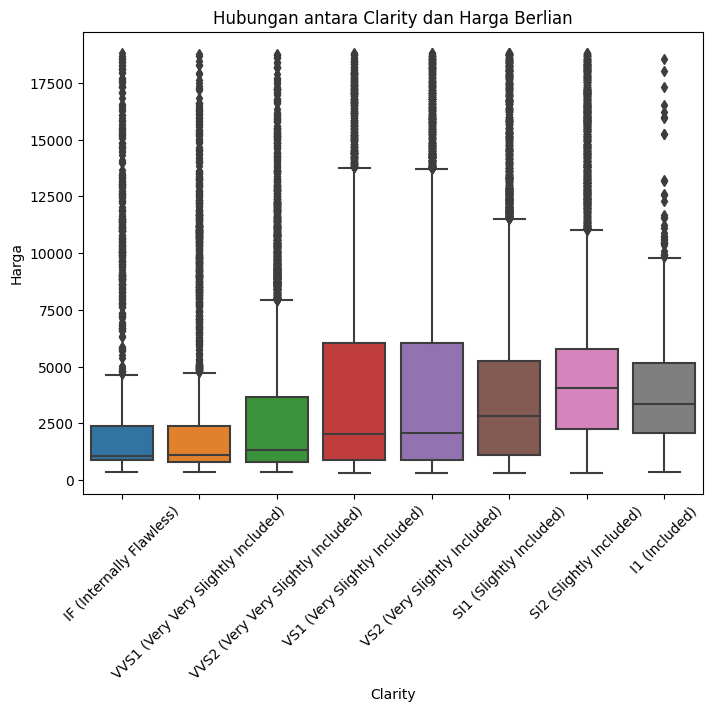

In [114]:
# Visualisasi hubungan antara clarity dan harga
plt.figure( figsize=(8, 6) )
sns.boxplot( data=df, x='clarity', y='price', order=[ "IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1" ])
plt.title( 'Hubungan antara Clarity dan Harga Berlian' )
plt.xlabel( 'Clarity' )
plt.xticks( np.arange(8), [ "IF (Internally Flawless)", "VVS1 (Very Very Slightly Included)", "VVS2 (Very Very Slightly Included)", "VS1 (Very Slightly Included)", "VS2 (Very Slightly Included)", "SI1 (Slightly Included)", "SI2 (Slightly Included)", "I1 (Included)" ] )
plt.ylabel( 'Harga' )
plt.xticks( rotation=45 )
plt.show()

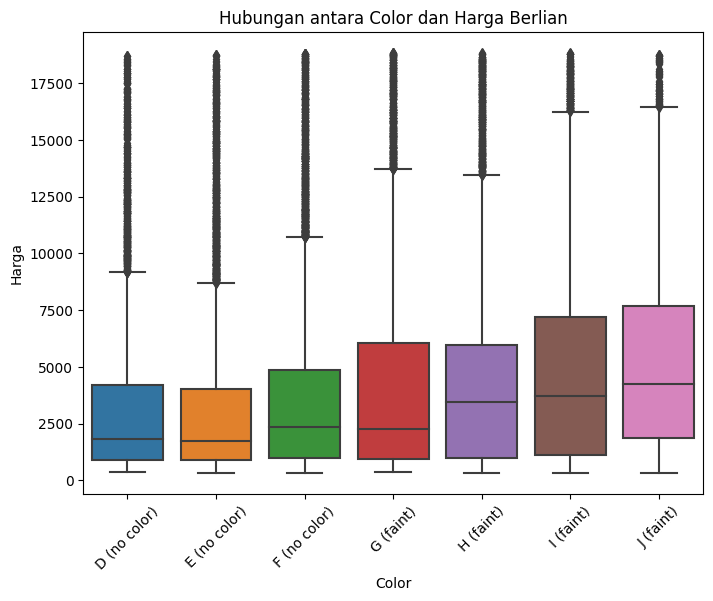

In [115]:
# Visualisasi hubungan antara clarity dan harga
plt.figure( figsize=(8, 6) )
sns.boxplot( data=df, x='color', y='price', order=["D", "E", "F", "G", "H", "I", "J"] )
plt.title( 'Hubungan antara Color dan Harga Berlian')
plt.xlabel( 'Color' )
plt.xticks( np.arange(7), ["D (no color)", "E (no color)", "F (no color)", "G (faint)", "H (faint)", "I (faint)", "J (faint)"] )
plt.ylabel( 'Harga' )
plt.xticks(rotation=45)
plt.show()

In [116]:
# sns.pairplot(df)

##Exploration

##COMPARISON


In [117]:
df_com = df.copy()

In [118]:
cut_attribute = ['x','y','z','depth','table']

In [119]:
new_list = ['cut']
for i in range(len(cut_attribute)-1):
  for j in range(i+1, len(cut_attribute)):
    temp_name = str(cut_attribute[i]) + '_' + str(cut_attribute[j])
    # print(temp_name)
    df_com[temp_name] = abs(df_com[cut_attribute[i]] / df_com[cut_attribute[j]])
    new_list.append(temp_name)

In [120]:
print(new_list)

['cut', 'x_y', 'x_z', 'x_depth', 'x_table', 'y_z', 'y_depth', 'y_table', 'z_depth', 'z_table', 'depth_table']


In [121]:
# df_com['xy'] = abs(df_com['x'] / df_com['y'])
# df_com['xdepth'] = abs(df_com['x'] / df_com['depth'])
# df_com['ydepth'] = abs(df_com['y'] / df_com['depth'])
# df_com['zdepth'] = abs(df_com['z'] / df_com['depth'])
# df_com['xyzd'] = abs(df_com['xy'] / df_com['zdepth'])

In [122]:
# df_shape=['x','y','z','depth','xy','xdepth','ydepth','zdepth','xyzd','cut']

In [123]:
df_com['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [124]:
category_encoding = {'Ideal' : 0, 'Premium' : 1, 'Good' : 3, 'Very Good' :2, 'Fair' : 4}

In [125]:
df_com.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_y,x_z,x_depth,x_table,y_z,y_depth,y_table,z_depth,z_table,depth_table
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,1.625514,0.064228,0.071818,1.637860,0.064715,0.072364,0.039512,0.044182,1.118182
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,1.683983,0.065050,0.063770,1.662338,0.064214,0.062951,0.038629,0.037869,0.980328
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,1.753247,0.071178,0.062308,1.761905,0.071529,0.062615,0.040598,0.035538,0.875385
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,1.596958,0.067308,0.072414,1.608365,0.067788,0.072931,0.042147,0.045345,1.075862
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,1.578182,0.068562,0.074828,1.581818,0.068720,0.075000,0.043444,0.047414,1.091379


In [126]:
df_com['cut'] = df_com['cut'].map(category_encoding)

In [127]:
df_com.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_y,x_z,x_depth,x_table,y_z,y_depth,y_table,z_depth,z_table,depth_table
0,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,1.625514,0.064228,0.071818,1.637860,0.064715,0.072364,0.039512,0.044182,1.118182
1,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,1.683983,0.065050,0.063770,1.662338,0.064214,0.062951,0.038629,0.037869,0.980328
2,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,1.753247,0.071178,0.062308,1.761905,0.071529,0.062615,0.040598,0.035538,0.875385
3,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,1.596958,0.067308,0.072414,1.608365,0.067788,0.072931,0.042147,0.045345,1.075862
4,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,1.578182,0.068562,0.074828,1.581818,0.068720,0.075000,0.043444,0.047414,1.091379


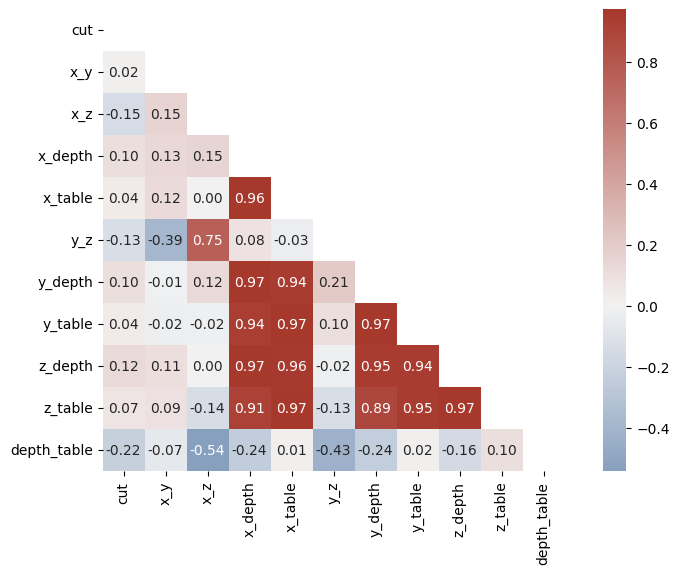

In [128]:
# menampilkan korelasi
diamond_corr = df_com[new_list].corr()
mask = np.triu(np.ones_like(diamond_corr, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(10, 6))
sns.heatmap(diamond_corr, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
plt.show()

##Carat - Price

Hypothesis : carat merupakan representasi dari ukuran berlian secara overall, dgn coefficien yang tinggi terhadap price.

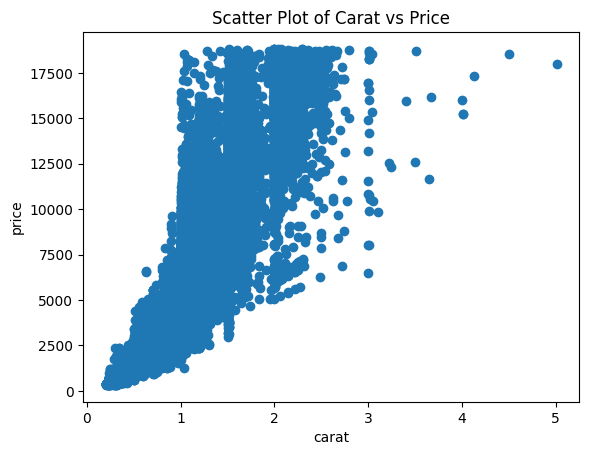

In [129]:
plt.scatter(df['carat'], df['price'])
plt.ylabel('price')
plt.xlabel('carat')
plt.title('Scatter Plot of Carat vs Price')
plt.show()

In [130]:
# sns.scatterplot(data=df, x='carat', y='price', hue='cut' )
# plt.ylabel('price')
# plt.xlabel('depth')
# plt.title('Plot of Depth and Price with Hue Cut')
# plt.show()

In [131]:
carat_array = df['carat'].values
price_array = df['price'].values

## Carat - Price Try K-Means

In [132]:
X = np.array(list(zip(carat_array, price_array))).reshape(len(carat_array), 2)

In [133]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters to each data point. Typically, the Euclidean distance metric is used.

In [134]:
temp = 0
for key, val in mapping1.items():
    if key != 1:
      print(f'gap : {abs(temp-val)}')
    print(f'{key} : {val}')
    temp = val

1 : 3030.603318525095
gap : 1295.7736992513658
2 : 1734.8296192737291
gap : 659.9961099757104
3 : 1074.8335092980187
gap : 253.01321377798251
4 : 821.8202955200362
gap : 158.98104859024863
5 : 662.8392469297876
gap : 135.66482297675964
6 : 527.1744239530279
gap : 81.01493994391626
7 : 446.1594840091117
gap : 44.849412533410714
8 : 401.31007147570097
gap : 48.00559697759303
9 : 353.30447449810794


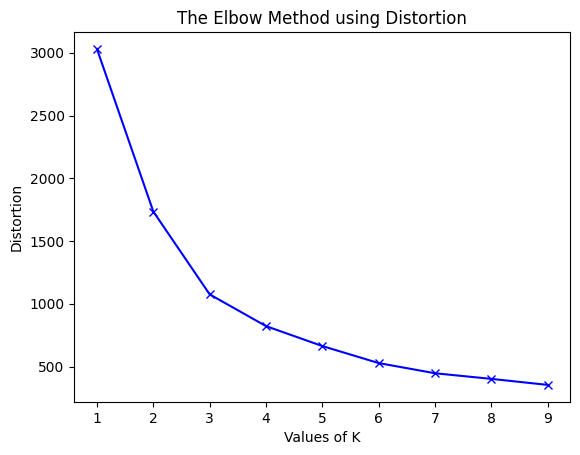

In [135]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Inertia: It is the sum of the squared distances of samples to their closest cluster center.

In [136]:
temp = 0
for key, val in mapping2.items():
    if key != 1:
      print(f'gap : {abs(temp-val)}')
    print(f'{key} : {val}')
    temp = val

1 : 855580740468.0646
gap : 610527201575.4879
2 : 245053538892.57663
gap : 141997775043.0947
3 : 103055763849.48193
gap : 46073175718.04667
4 : 56982588131.435265
gap : 19526965167.203316
5 : 37455622964.23195
gap : 12169342305.93975
6 : 25286280658.2922
gap : 7178201989.589172
7 : 18108078668.703026
gap : 4116213241.1833
8 : 13991865427.519726
gap : 2947606167.8645287
9 : 11044259259.655197


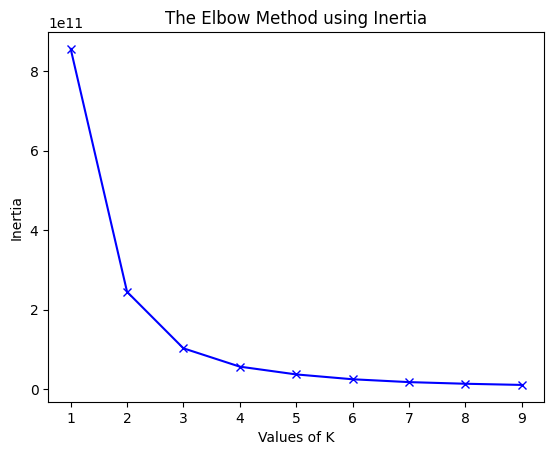

In [137]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Pada penggunaan inertia terlihat elbow method ada pada k = 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


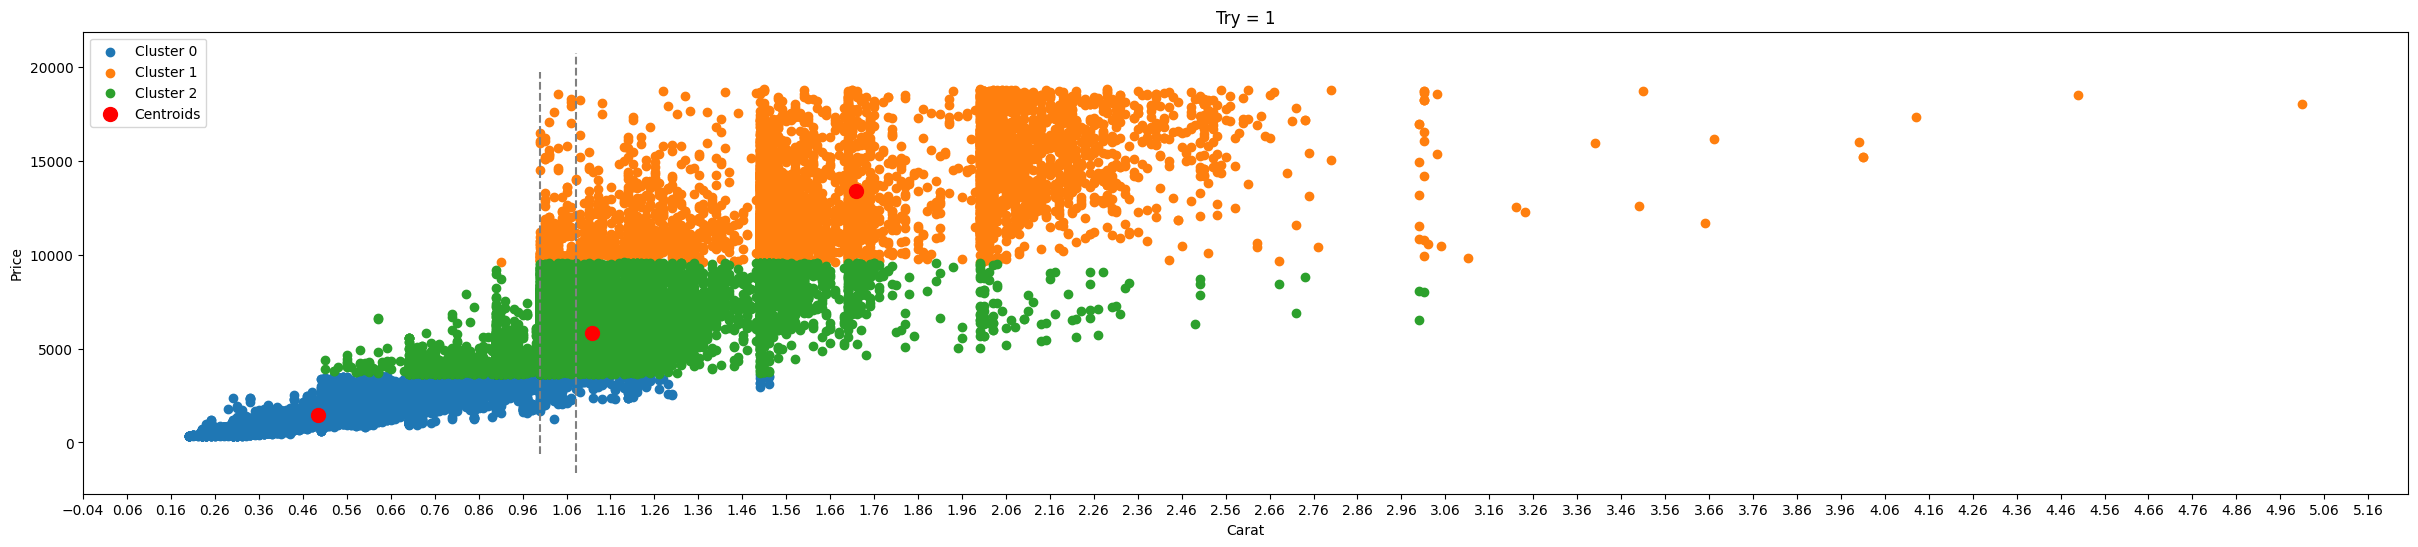

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


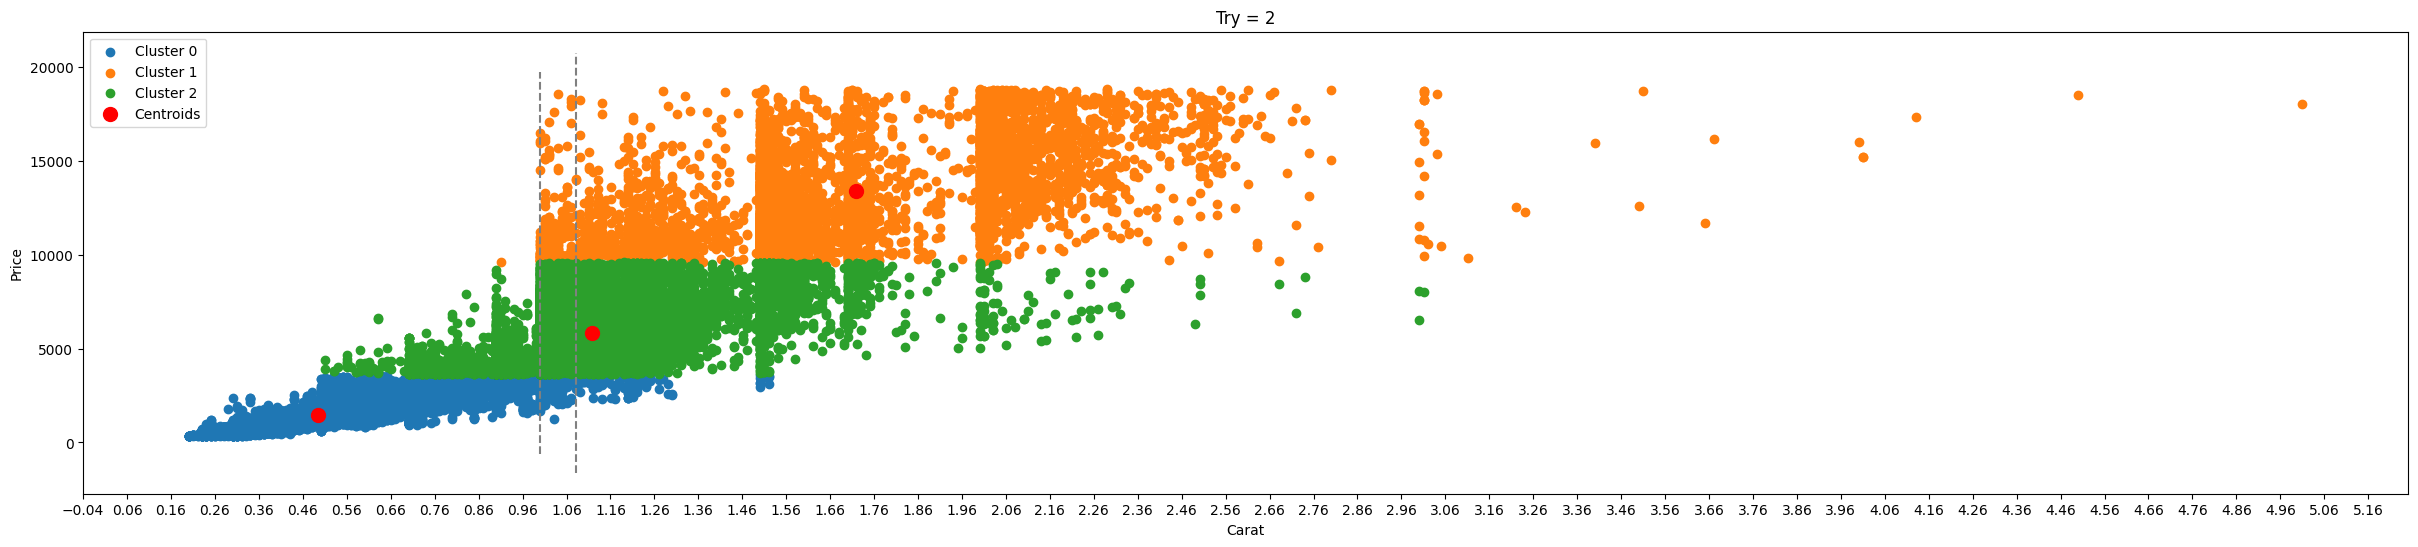

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


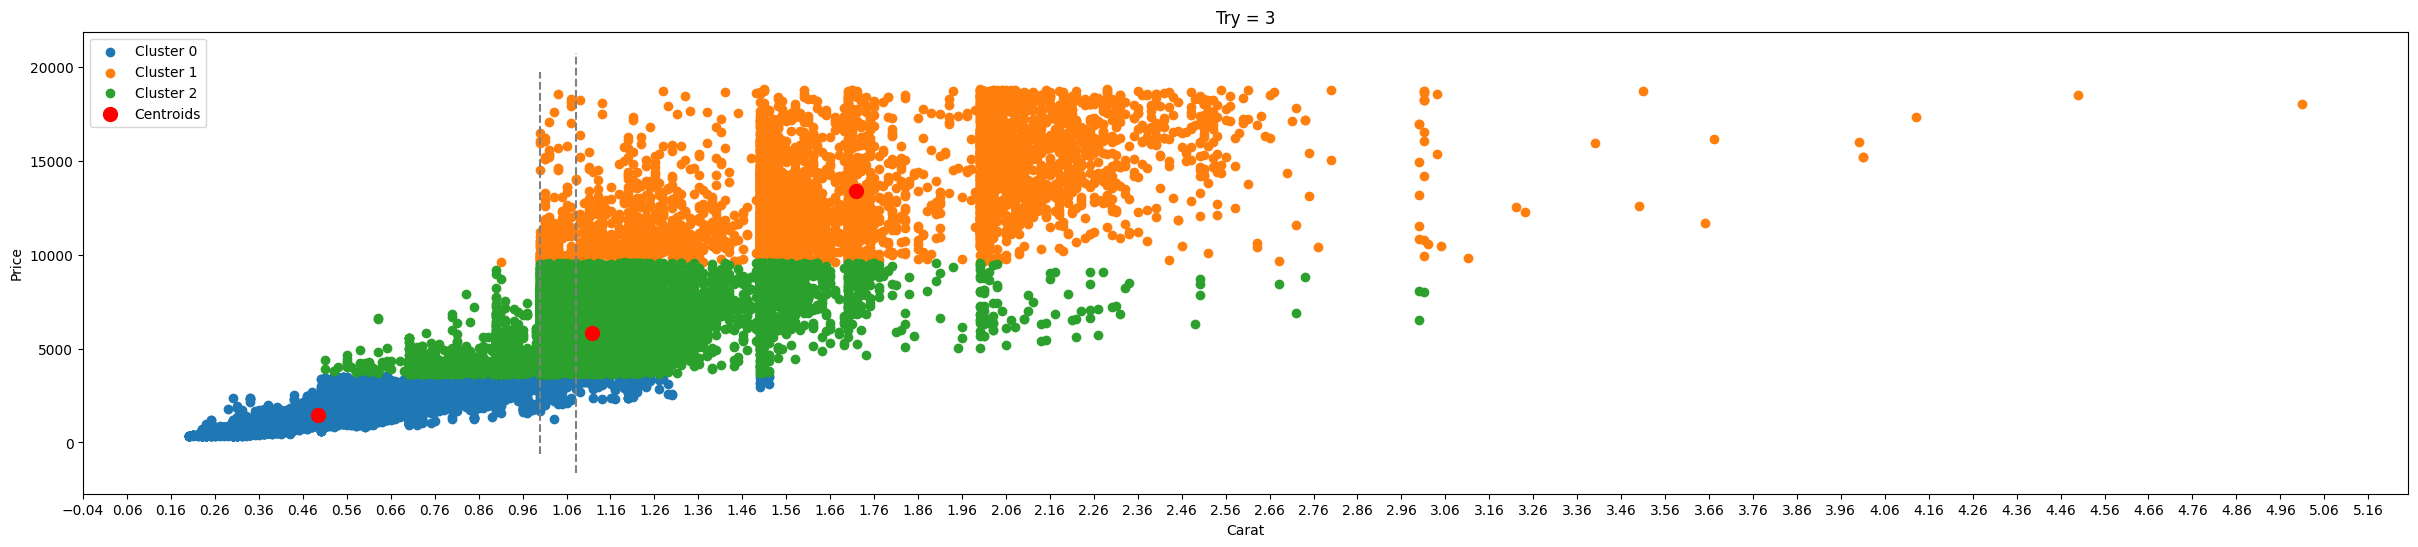

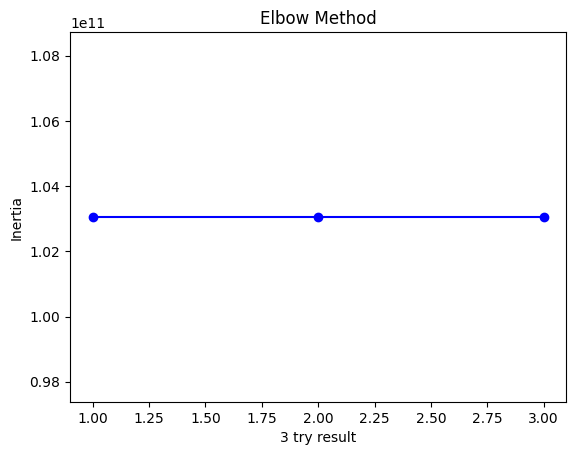

In [138]:
inertia_values = []
k_try = range(1, 4)

# Fit and plot the data for each k value
for k in k_try:
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)

    plt.figure(figsize=(30, 6))

    # Plot each cluster with a different color
    for cluster_label in np.unique(y_kmeans):
        plt.scatter(X[y_kmeans == cluster_label, 0], X[y_kmeans == cluster_label, 1], label=f'Cluster {cluster_label}')


    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
    plt.title(f'Try = {k}')
    plt.xlabel('Carat')
    plt.ylabel('Price')
    plt.xticks(np.arange(plt.xlim()[0], plt.xlim()[1] + 0.1, 0.1))
    plt.plot([1, 1], [plt.ylim()[0], plt.ylim()[1]], linestyle='--', color='gray')
    plt.plot([1.08, 1.08], [plt.ylim()[0], plt.ylim()[1]], linestyle='--', color='gray')
    plt.legend()
    plt.show()

# Plot the inertia values for each k
plt.plot(k_try, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('3 try result')
plt.ylabel('Inertia')
plt.show()


In [139]:
df_kmeans = df.copy()
df_kmeans['cluster'] = y_kmeans
df_kmeans.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cluster
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


[Text(0, 0, '32929'), Text(0, 0, '5605'), Text(0, 0, '15260')]

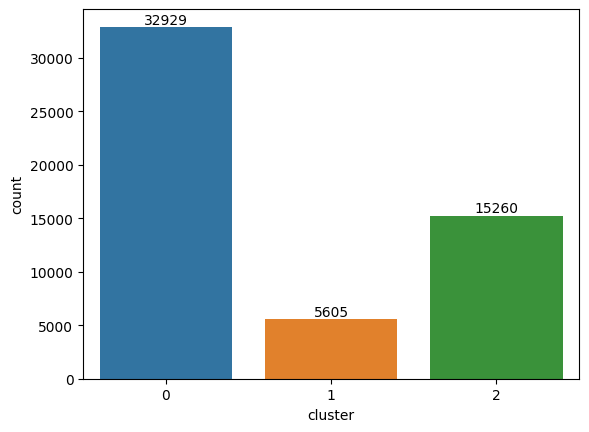

In [140]:
ax = sns.countplot(x= "cluster", data= df_kmeans, order=[0,1,2])
ax.bar_label(ax.containers[0])

##Carat - Price kmeans result visualitation

In [141]:
cluster_1_kmeans = df_kmeans[df_kmeans['cluster'] == 0]
cluster_2_kmeans = df_kmeans[df_kmeans['cluster'] == 1]
cluster_3_kmeans = df_kmeans[df_kmeans['cluster'] == 2]

In [142]:
cluster_1_kmeans.describe()

,carat,depth,table,price,x,y,z,cluster
count,32929.000000,32929.000000,32929.000000,32929.000000,32929.000000,32929.000000,32929.000000,32929.0
mean,0.493204,61.734723,57.194036,1463.283610,4.995031,5.002023,3.085932,0.0
std,0.190876,1.371201,2.220853,881.039051,0.620628,0.632669,0.419159,0.0
min,0.200000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000,0.0
25%,0.320000,61.100000,56.000000,743.000000,4.430000,4.440000,2.730000,0.0
50%,0.430000,61.800000,57.000000,1112.000000,4.840000,4.850000,2.990000,0.0
75%,0.630000,62.400000,58.000000,2087.000000,5.510000,5.510000,3.380000,0.0
max,1.520000,79.000000,79.000000,3634.000000,7.560000,31.800000,31.800000,0.0


In [143]:
cluster_2_kmeans.describe()

,carat,depth,table,price,x,y,z,cluster
count,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.0
mean,1.716856,61.643015,57.881338,13364.433898,7.634912,7.636698,4.699577,1.0
std,0.381543,1.437329,2.212512,2620.452898,0.594833,0.899048,0.400128,0.0
min,0.910000,55.200000,50.000000,9590.000000,0.000000,0.000000,0.000000,1.0
25%,1.500000,60.800000,56.000000,11086.000000,7.300000,7.300000,4.510000,1.0
50%,1.620000,61.800000,58.000000,12929.000000,7.570000,7.560000,4.650000,1.0
75%,2.010000,62.500000,59.000000,15485.000000,8.100000,8.090000,5.000000,1.0
max,5.010000,70.600000,95.000000,18823.000000,10.740000,58.900000,8.060000,1.0


In [144]:
cluster_3_kmeans.describe()

,carat,depth,table,price,x,y,z,cluster
count,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.0
mean,1.117436,61.815491,57.872490,5798.373853,6.620569,6.616949,4.089368,2.0
std,0.212788,1.543690,2.181702,1599.007290,0.418027,0.406126,0.271596,0.0
min,0.510000,43.000000,43.000000,3635.000000,0.000000,0.000000,0.000000,2.0
25%,1.010000,61.000000,56.000000,4467.000000,6.370000,6.370000,3.940000,2.0
50%,1.050000,62.000000,58.000000,5395.000000,6.550000,6.550000,4.040000,2.0
75%,1.210000,62.700000,59.000000,6906.000000,6.840000,6.830000,4.220000,2.0
max,3.010000,71.800000,69.000000,9587.000000,9.230000,9.100000,5.970000,2.0


In [145]:
# plt.figure( figsize=(15,6) )
# sns.histplot( cluster_1_kmeans['price'], bins=11602, kde=True )
# plt.title('Distribusi Harga berlian cluster 1')
# plt.xlabel('harga')
# plt.ylabel('frekuensi')
# plt.show()

# plt.figure( figsize=(15,6) )
# sns.histplot( cluster_2_kmeans['price'], bins=11602, kde=True )
# plt.title('Distribusi Harga berlian cluster 2')
# plt.xlabel('harga')
# plt.ylabel('frekuensi')
# plt.show()

# plt.figure( figsize=(15,6) )
# sns.histplot( cluster_3_kmeans['price'], bins=11602, kde=True )
# plt.title('Distribusi Harga berlian cluster 3')
# plt.xlabel('harga')
# plt.ylabel('frekuensi')
# plt.show()

##Carat - Price menghilangkan bias carat
Mengambil range carat yang isinya terdapat ketiga cluster untuk melihat faktor lain selain carat yang memiliki pengaruh besar terhadap harga

In [146]:
ranged_kmeans = df_kmeans[(df_kmeans['carat'] >= 1) & (df_kmeans['carat'] <= 1.08)]
print(len(ranged_kmeans))

6988


[Text(0, 0, '480'), Text(0, 0, '242'), Text(0, 0, '6266')]

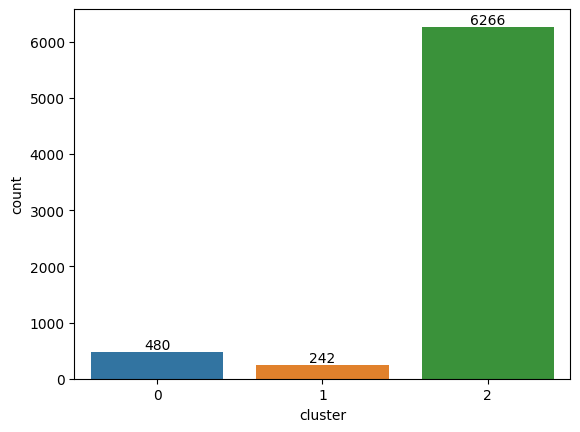

In [147]:
ax = sns.countplot(x= "cluster", data= ranged_kmeans, order=[0,1,2])
ax.bar_label(ax.containers[0])

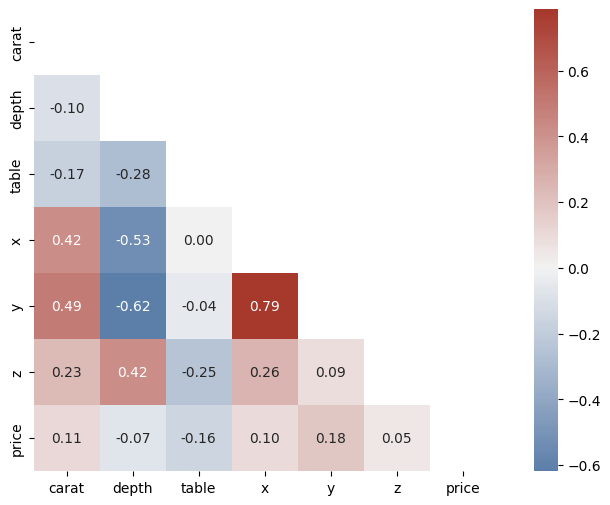

In [148]:
# menampilkan korelasi
diamond_corrranged = ranged_kmeans[df_numeric].corr()
mask = np.triu(np.ones_like(diamond_corrranged, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(10, 6))
sns.heatmap(diamond_corrranged, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
plt.show()

In [186]:
# cols = ['cut','color','clarity']
ranged_kmeans_encoded =  ranged_kmeans.copy()
for i in range(len(cols)):
  ranged_kmeans_encoded = ranged_kmeans_encoded.replace({cols[i]: encd[i]})

In [187]:
ranged_kmeans_encoded.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cluster
215,1.01,1,2,7,61.8,60.0,2781,6.39,6.36,3.94,0
241,1.01,4,1,7,64.5,58.0,2788,6.29,6.21,4.03,0
242,1.01,1,4,6,62.7,59.0,2788,6.31,6.22,3.93,0
247,1.05,2,6,6,63.2,56.0,2789,6.49,6.45,4.09,0
255,1.05,4,6,6,65.8,59.0,2789,6.41,6.27,4.18,0


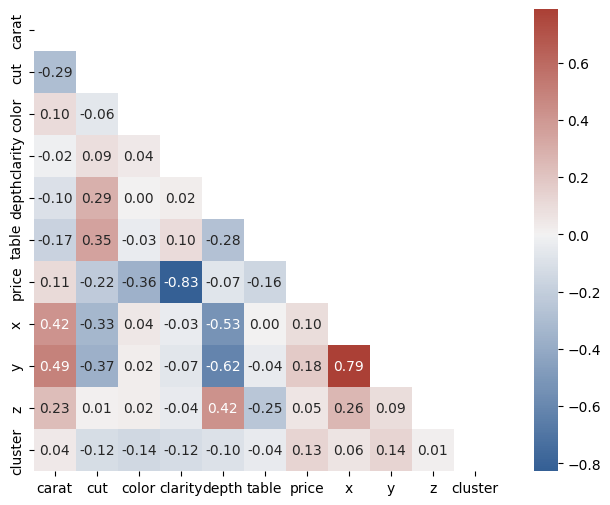

In [188]:
dc = ranged_kmeans_encoded.corr()
mask = np.triu(np.ones_like(dc, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(10, 6))
sns.heatmap(dc, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
plt.show()

In [152]:
for i in cols:
  correlation_coefficient, p_value = pointbiserialr(ranged_kmeans['price'], ranged_kmeans_encoded[i])
  print(f"Feature : {i} || Correlation Coefficient : {correlation_coefficient}")

Feature : cut || Correlation Coefficient : 0.11217022148721605
Feature : color || Correlation Coefficient : -0.3645115316831901
Feature : clarity || Correlation Coefficient : 0.5170613174984762


In [153]:
correlation_coefficient, p_value = pointbiserialr(ranged_kmeans_encoded['price'], ranged_kmeans_encoded['color'])
print(f"Point-Biserial Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Point-Biserial Correlation Coefficient: -0.3645115316831901
P-value: 1.406681615502059e-218


In [154]:
correlation_coefficient, p_value = pointbiserialr(ranged_kmeans_encoded['cut'], ranged_kmeans_encoded['color'])
print(f"Point-Biserial Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Point-Biserial Correlation Coefficient: -0.023567460609871995
P-value: 0.04883544271541522


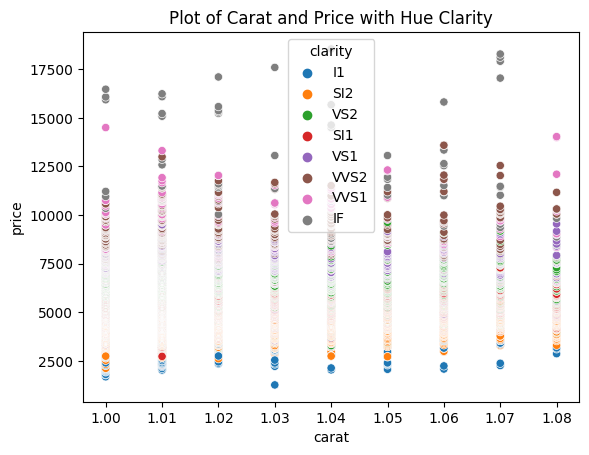

In [155]:
sns.scatterplot(data=ranged_kmeans, x='carat', y='price', hue='clarity' )
plt.ylabel('price')
plt.xlabel('carat')
plt.title('Plot of Carat and Price with Hue Clarity')
plt.show()

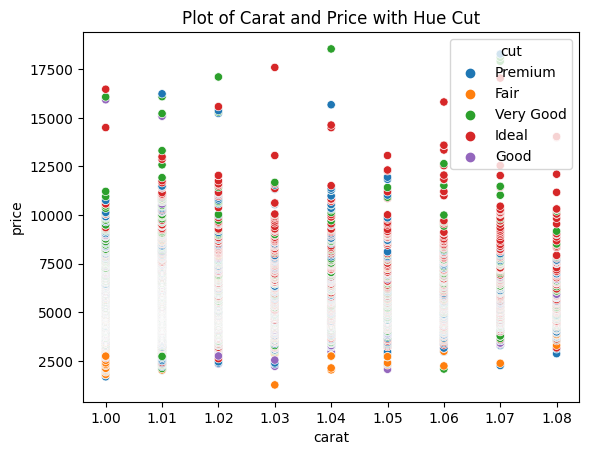

In [156]:
sns.scatterplot(data=ranged_kmeans, x='carat', y='price', hue='cut' )
plt.ylabel('price')
plt.xlabel('carat')
plt.title('Plot of Carat and Price with Hue Cut')
plt.show()

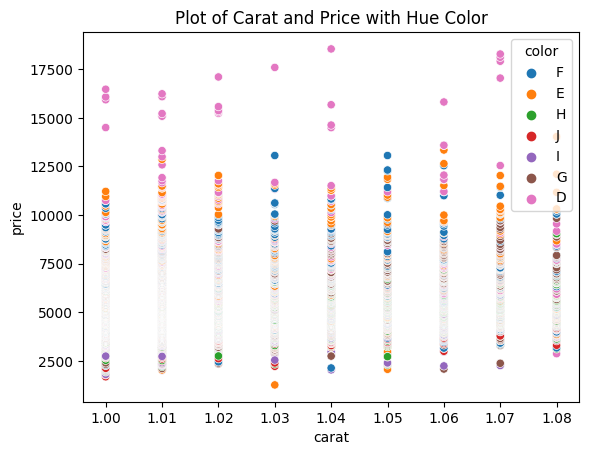

In [157]:
sns.scatterplot(data=ranged_kmeans, x='carat', y='price', hue='color' )
plt.ylabel('price')
plt.xlabel('carat')
plt.title('Plot of Carat and Price with Hue Color')
plt.show()

Pembagian dataframe dari dataframe yang sudah di potong berdasarkan setiap cluster

In [158]:
cluster_0_ranged_kmeans = ranged_kmeans[ranged_kmeans['cluster'] == 0]
cluster_1_ranged_kmeans = ranged_kmeans[ranged_kmeans['cluster'] == 1]
cluster_2_ranged_kmeans = ranged_kmeans[ranged_kmeans['cluster'] == 2]

In [159]:
data = {'Class': [],'Category' : [],'Total': [],'Cluster_1': [],'Cluster_1_precentage': [],'Cluster_2': [],'Cluster_2_precentage': [],'Cluster_0': [],'Cluster_0_precentage': [],}
statistic_class = pd.DataFrame(data)

Data presentase distribusi dari categorical class untuk setiap clusternya

[Text(0, 0, '120'),
 Text(0, 0, '78'),
 Text(0, 0, '66'),
 Text(0, 0, '147'),
 Text(0, 0, '69')]

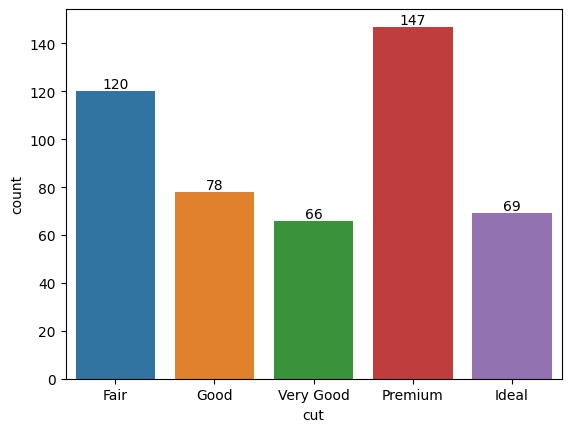

In [160]:
# From Worst to Best (Fair= Worst) ,(Ideal= Best)
# from most expensive to cheapest 1-2-0
ax = sns.countplot(x= "cut", data= cluster_0_ranged_kmeans, order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
ax.bar_label(ax.containers[0])

[Text(0, 0, '245'),
 Text(0, 0, '864'),
 Text(0, 0, '1586'),
 Text(0, 0, '1841'),
 Text(0, 0, '1730')]

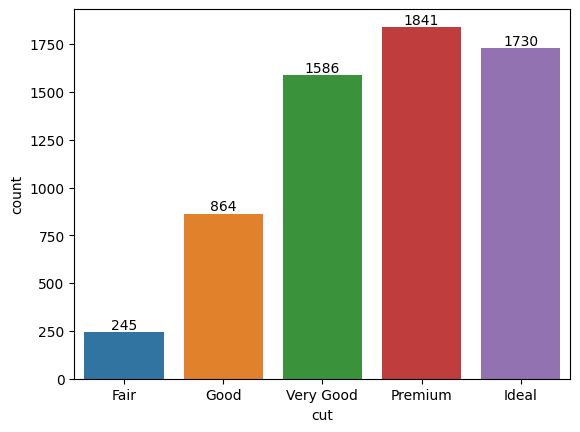

In [161]:
ax = sns.countplot(x= "cut", data= cluster_2_ranged_kmeans, order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
ax.bar_label(ax.containers[0])

[Text(0, 0, '120'),
 Text(0, 0, '78'),
 Text(0, 0, '66'),
 Text(0, 0, '147'),
 Text(0, 0, '69')]

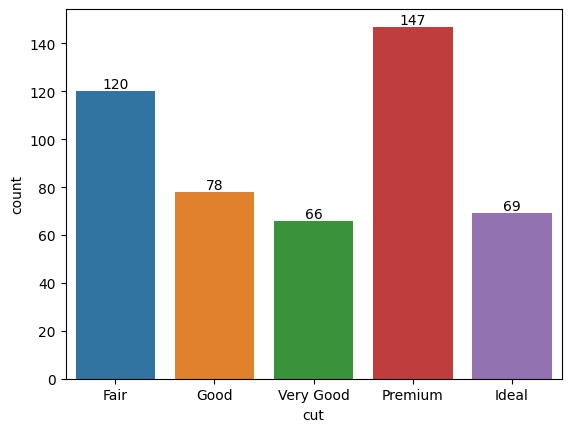

In [162]:
# From Worst to Best (Fair= Worst) ,(Ideal= Best)
# from most expensive to cheapest 1-2-0
ax = sns.countplot(x= "cut", data= cluster_0_ranged_kmeans, order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
ax.bar_label(ax.containers[0])

# ax = sns.countplot(x= "cut", data= cluster_1_ranged_kmeans, order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
# ax.bar_label(ax.containers[0])

# ax = sns.countplot(x= "cut", data= cluster_2_ranged_kmeans, order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
# ax.bar_label(ax.containers[0])

[Text(0, 0, '810'),
 Text(0, 0, '1179'),
 Text(0, 0, '1470'),
 Text(0, 0, '1628'),
 Text(0, 0, '1129'),
 Text(0, 0, '504'),
 Text(0, 0, '268')]

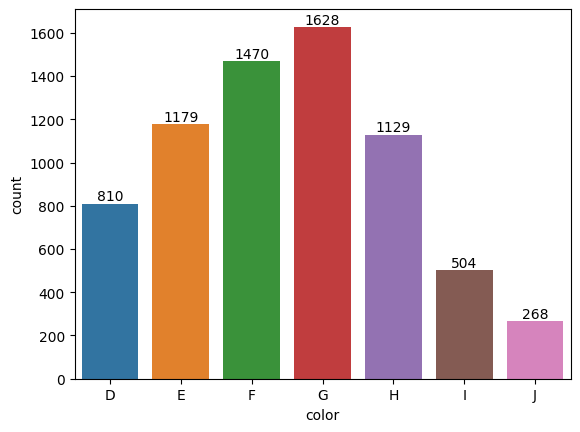

In [163]:
# From Best to Worst (Best = D - F), (Worst = G - J)
ax = sns.countplot(x= "color", data= ranged_kmeans, order=["D", "E", "F", "G", "H", "I", "J"])
ax.bar_label(ax.containers[0])

[Text(0, 0, '117'),
 Text(0, 0, '162'),
 Text(0, 0, '450'),
 Text(0, 0, '799'),
 Text(0, 0, '1469'),
 Text(0, 0, '1997'),
 Text(0, 0, '1853'),
 Text(0, 0, '141')]

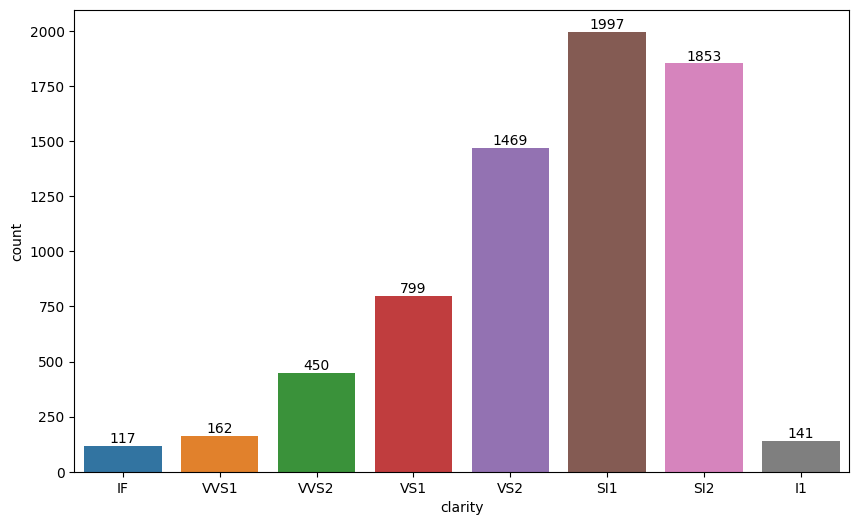

In [164]:
# From Best to Worst (Best = FL - IF), (Moderate = VVS1 - SI2), (Worst= I1 - I3)
plt.figure(figsize= (10, 6))
ax = sns.countplot( x= "clarity", data= ranged_kmeans, order=[ "IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1" ] )
ax.bar_label(ax.containers[0])

In [165]:
for _class in df_category:
  for _cat in ranged_kmeans[_class].unique():
    temp_total = ranged_kmeans[ranged_kmeans[_class] == _cat ].shape[0]
    temp_amount1 = cluster_1_ranged_kmeans[cluster_1_ranged_kmeans[_class] == _cat].shape[0]
    temp_amount2 = cluster_2_ranged_kmeans[cluster_2_ranged_kmeans[_class] == _cat].shape[0]
    temp_amount0 = cluster_0_ranged_kmeans[cluster_0_ranged_kmeans[_class] == _cat].shape[0]
    temp_data = {'Class': [_class],
                 'Category': [_cat],
                 'Total': [temp_total],
                 'Cluster_1': [temp_amount1],
                 'Cluster_1_precentage': [temp_amount1/temp_total*100],
                 'Cluster_2': [temp_amount2],
                 'Cluster_2_precentage': [temp_amount2/temp_total*100],
                 'Cluster_0': [temp_amount0],
                 'Cluster_0_precentage': [temp_amount0/temp_total*100],
                 }
    df_to_append = pd.DataFrame(temp_data)
    statistic_class = pd.concat([statistic_class,df_to_append], ignore_index=True)


In [166]:
statistic_class.head(len(statistic_class))

,Class,Category,Total,Cluster_1,Cluster_1_precentage,Cluster_2,Cluster_2_precentage,Cluster_0,Cluster_0_precentage
0,cut,Premium,2036.0,48.0,2.357564,1841.0,90.422397,147.0,7.220039
1,cut,Fair,368.0,3.0,0.815217,245.0,66.576087,120.0,32.608696
2,cut,Very Good,1721.0,69.0,4.009297,1586.0,92.155723,66.0,3.834980
3,cut,Ideal,1913.0,114.0,5.959226,1730.0,90.433873,69.0,3.606900
4,cut,Good,950.0,8.0,0.842105,864.0,90.947368,78.0,8.210526
5,color,F,1470.0,63.0,4.285714,1350.0,91.836735,57.0,3.877551
6,color,E,1179.0,88.0,7.463953,1047.0,88.804071,44.0,3.731976
7,color,H,1129.0,0.0,0.000000,1036.0,91.762622,93.0,8.237378
8,color,J,268.0,0.0,0.000000,168.0,62.686567,100.0,37.313433
9,color,I,504.0,0.0,0.000000,416.0,82.539683,88.0,17.460317


Statistik jumlah hasil dari categorical class pada setiap cluster

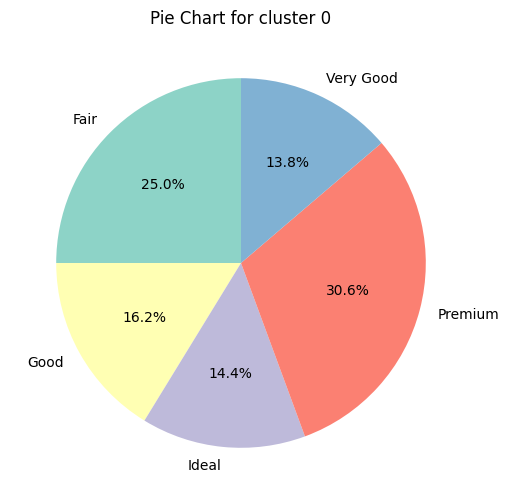

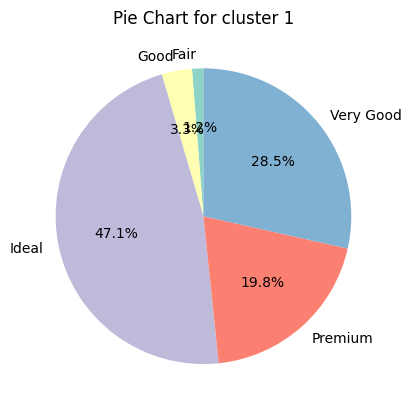

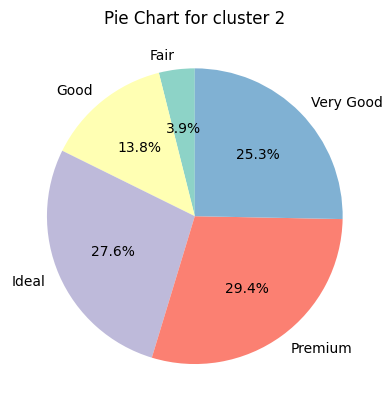

In [167]:
# Group by 'Cluster' and 'category', count occurrences, and reset index
grouped_df = ranged_kmeans.groupby(['cluster', 'cut']).size().reset_index(name='Count')

# Plot a pie chart for each cluster
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3.colors  # Set color palette
for cluster in grouped_df['cluster'].unique():
    cluster_data = grouped_df[grouped_df['cluster'] == cluster]
    plt.pie(cluster_data['Count'], labels=cluster_data['cut'], autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Pie Chart for cluster {cluster}')
    plt.show()

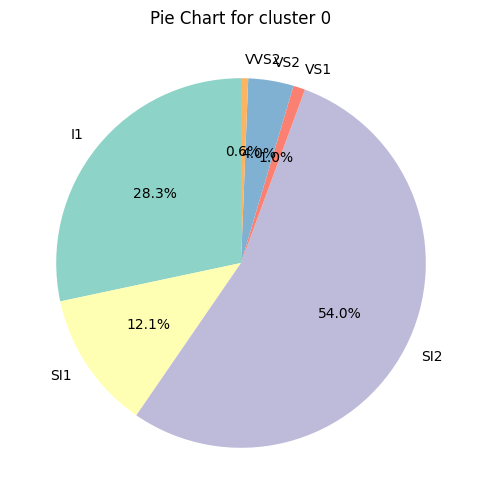

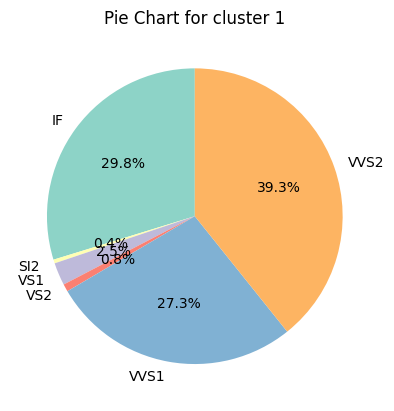

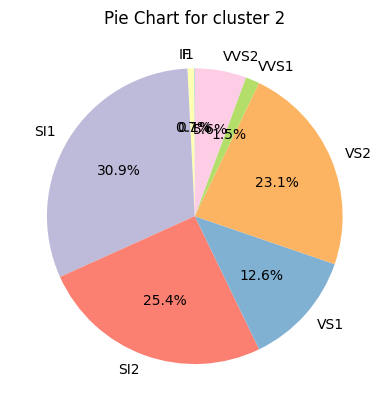

In [168]:
# Group by 'Cluster' and 'category', count occurrences, and reset index
grouped_df = ranged_kmeans.groupby(['cluster', 'clarity']).size().reset_index(name='Count')

# Plot a pie chart for each cluster
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3.colors  # Set color palette
for cluster in grouped_df['cluster'].unique():
    cluster_data = grouped_df[grouped_df['cluster'] == cluster]
    plt.pie(cluster_data['Count'], labels=cluster_data['clarity'], autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Pie Chart for cluster {cluster}')
    plt.show()

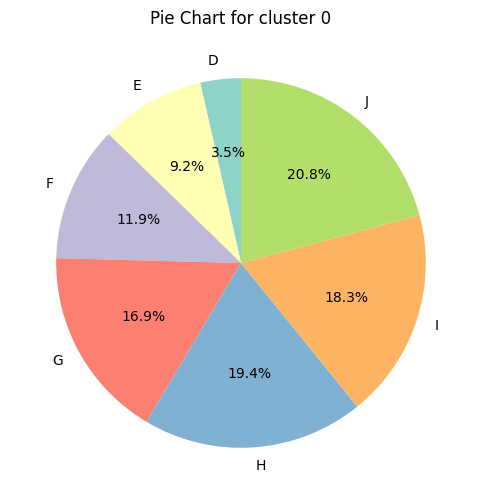

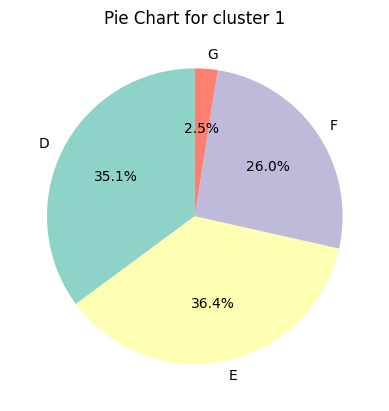

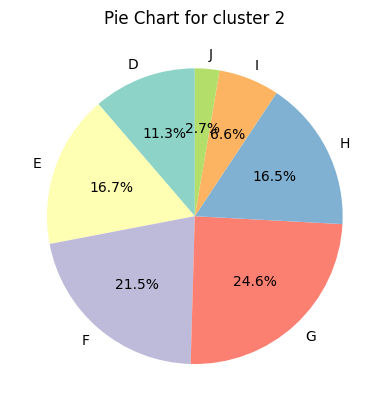

In [169]:
# Group by 'Cluster' and 'category', count occurrences, and reset index
grouped_df = ranged_kmeans.groupby(['cluster', 'color']).size().reset_index(name='Count')

# Plot a pie chart for each cluster
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3.colors  # Set color palette
for cluster in grouped_df['cluster'].unique():
    cluster_data = grouped_df[grouped_df['cluster'] == cluster]
    plt.pie(cluster_data['Count'], labels=cluster_data['color'], autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Pie Chart for cluster {cluster}')
    plt.show()

##Modeling tes
melakukan modeling, melihat penggunaan x dari fitur mana yang menghasilkan prediksi terbaik


In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [171]:
col_to_test = ['clarity','cut','color']

Test on all dataset

In [172]:
data = {
    'Feature': [],
    'Cross-Validation 3 cut RMSE' : [],
    'Cross-Validation 5 cut RMSE': [],
    'MSE': [],
    'RMSE': [],
    'R2': [],}
statistic_column_all = pd.DataFrame(data)

In [173]:
for _column in col_to_test:
  X = df_encoded[['carat', _column]]
  y = df_encoded['price']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

  model_carat_clarity = DecisionTreeRegressor()

  cv_scores3 = cross_val_score(model_carat_clarity, X_train, y_train, cv=3)
  cv_scores5 = cross_val_score(model_carat_clarity, X_train, y_train, cv=5)

  # Fit the model on the training data
  model_carat_clarity.fit(X_train, y_train)

  # Predict on the test data
  y_pred = model_carat_clarity.predict(X_test)

  r2_square = metrics.r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  temp_data = {
    'Feature': [_column],
    'Cross-Validation 3 cut RMSE' : [np.mean(np.sqrt(cv_scores3))],
    'Cross-Validation 5 cut RMSE': [np.mean(np.sqrt(cv_scores5))],
    'MSE': [mse],
    'RMSE': [rmse],
    'R2': [r2_square],}
  df_to_append = pd.DataFrame(temp_data)
  statistic_column_all = pd.concat([statistic_column_all,df_to_append], ignore_index=True)

In [174]:
statistic_column_all.head()

,Feature,Cross-Validation 3 cut RMSE,Cross-Validation 5 cut RMSE,MSE,RMSE,R2
0,clarity,0.966119,0.965924,1.011550e+06,1005.758225,0.933634
1,cut,0.935117,0.935549,1.865897e+06,1365.978511,0.877582
2,color,0.942615,0.944133,1.536678e+06,1239.628098,0.899182


Test on cutted dataset(1 ≤ carat ≤ 1.08)

In [175]:
data = {
    'Feature': [],
    'Cross-Validation 3 cut RMSE' : [],
    'Cross-Validation 5 cut RMSE': [],
    'MSE': [],
    'RMSE': [],
    'R2': [],}
statistic_column_cutted = pd.DataFrame(data)

In [176]:
for _column in col_to_test:
  X = ranged_kmeans_encoded[['carat', _column]]
  y = ranged_kmeans_encoded['price']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

  model_carat_clarity = DecisionTreeRegressor()

  cv_scores3 = cross_val_score(model_carat_clarity, X_train, y_train, cv=3)
  cv_scores5 = cross_val_score(model_carat_clarity, X_train, y_train, cv=5)

  # Fit the model on the training data
  model_carat_clarity.fit(X_train, y_train)

  # Predict on the test data
  y_pred = model_carat_clarity.predict(X_test)

  r2_square = metrics.r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  temp_data = {
    'Feature': [_column],
    'Cross-Validation 3 cut RMSE' : [np.mean(np.sqrt(cv_scores3))],
    'Cross-Validation 5 cut RMSE': [np.mean(np.sqrt(cv_scores5))],
    'MSE': [mse],
    'RMSE': [rmse],
    'R2': [r2_square],}
  df_to_append = pd.DataFrame(temp_data)
  statistic_column_cutted = pd.concat([statistic_column_cutted,df_to_append], ignore_index=True)

In [177]:
statistic_column_cutted.head()

,Feature,Cross-Validation 3 cut RMSE,Cross-Validation 5 cut RMSE,MSE,RMSE,R2
0,clarity,0.837827,0.836960,9.162993e+05,957.235261,0.722188
1,cut,0.256765,0.261409,3.181850e+06,1783.774163,0.035298
2,color,0.416783,0.416409,2.751183e+06,1658.668915,0.165871


##Test on various range

In [178]:
maxRange = np.arange(1, 1.11, 0.01)

In [179]:
print(maxRange)

[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11]


In [180]:
def each_column():
  for _column in col_to_test:
    X = ranged_kmeans_encoded[['carat', _column]]
    y = ranged_kmeans_encoded['price']


In [181]:
various_range = []

for i in maxRange:
  df_testing = df.copy()
  df_testing[(df_testing['carat'] >= 1) & (df_testing['carat'] <= i)]
  df_testing[cols] = df_testing[cols].apply(LabelEncoder().fit_transform)
  data = {
      'Feature': [],
      'Cross-Validation 3 cut RMSE' : [],
      'Cross-Validation 5 cut RMSE': [],
      'MSE': [],
      'RMSE': [],
      'R2': [],}
  statistic_column_cutted = pd.DataFrame(data)
  for _column in col_to_test:
    X = df_testing[['carat', _column]]
    y = df_testing['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

    model_carat_clarity = DecisionTreeRegressor()

    cv_scores3 = cross_val_score(model_carat_clarity, X_train, y_train, cv=3)
    cv_scores5 = cross_val_score(model_carat_clarity, X_train, y_train, cv=5)

    # Fit the model on the training data
    model_carat_clarity.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model_carat_clarity.predict(X_test)

    #metrics evaluation
    r2_square = metrics.r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    #Storing data
    temp_data = {
      'Feature': [_column],
      'Cross-Validation 3 cut RMSE' : [np.mean(np.sqrt(cv_scores3))],
      'Cross-Validation 5 cut RMSE': [np.mean(np.sqrt(cv_scores5))],
      'MSE': [mse],
      'RMSE': [rmse],
      'R2': [r2_square],}
    df_to_append = pd.DataFrame(temp_data)
    statistic_column_cutted = pd.concat([statistic_column_cutted,df_to_append], ignore_index=True)

  # statistic_column_cutted.style.set_caption(f"In range 1 ≤ x ≤ {i}")


  # display(statistic_column_cutted)
  various_range.append(statistic_column_cutted)

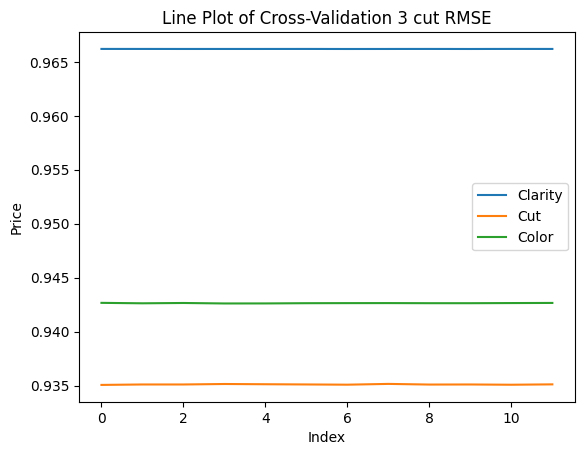

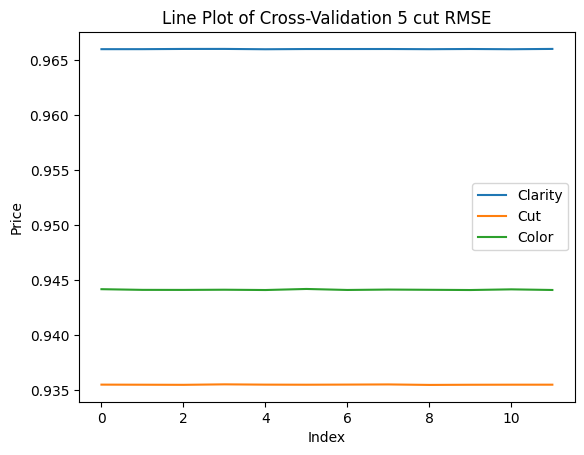

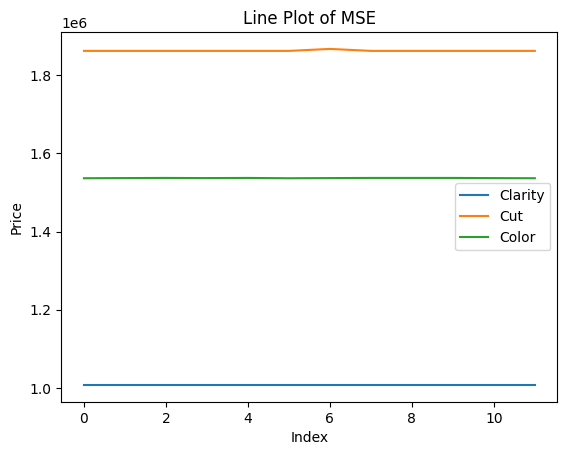

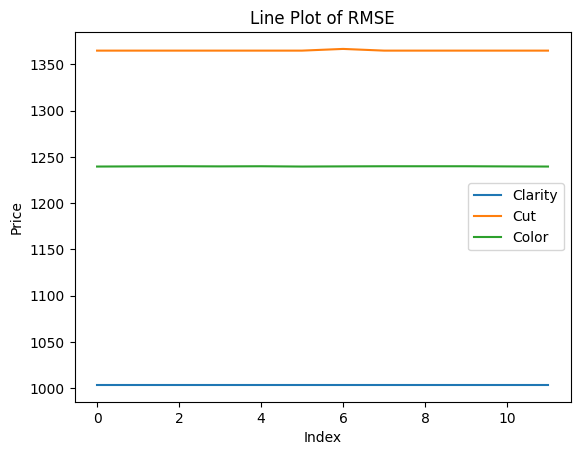

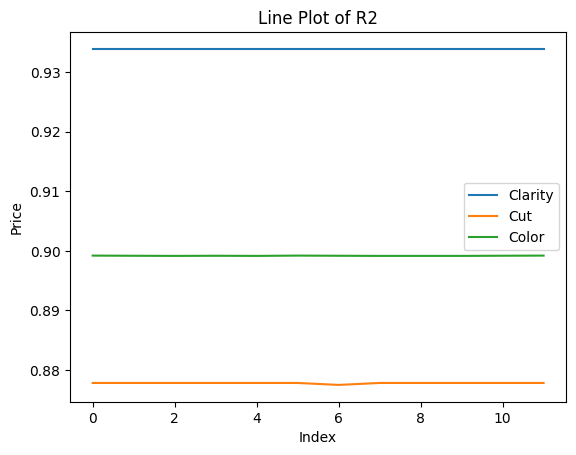

In [182]:
metrics = ['Cross-Validation 3 cut RMSE','Cross-Validation 5 cut RMSE','MSE','RMSE','R2']
for i in metrics:
  plt.plot([var[i] for var in various_range])
  legend_labels = ['Clarity','Cut','Color']
  plt.title(f'Line Plot of {i}')
  plt.xlabel('Index')
  plt.ylabel('Price')
  plt.legend(legend_labels)
  plt.show()

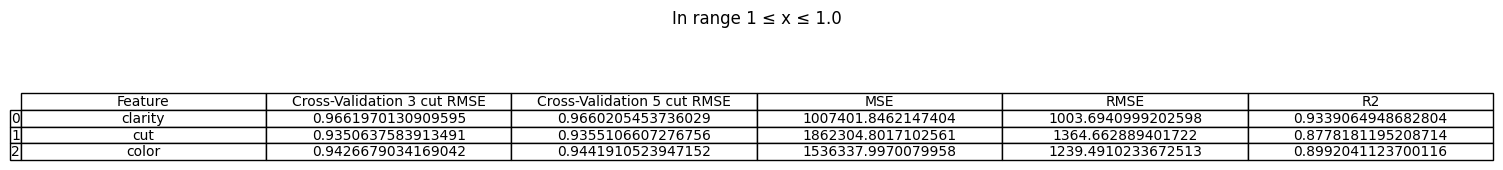

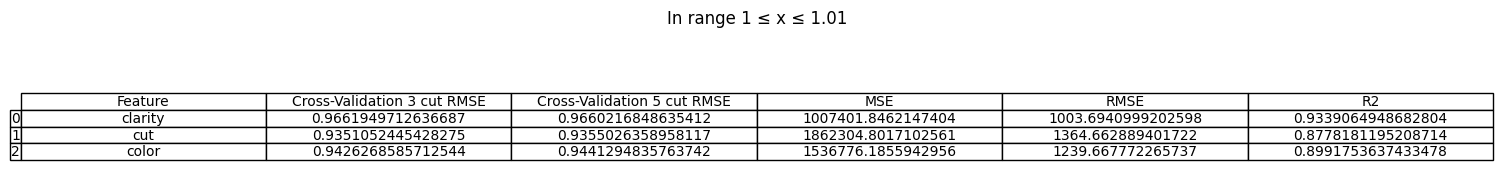

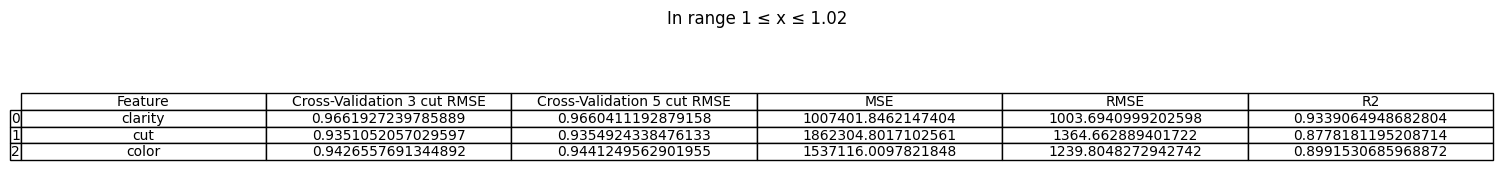

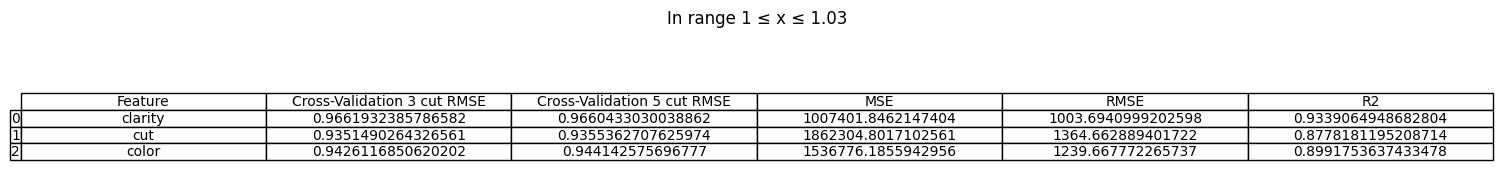

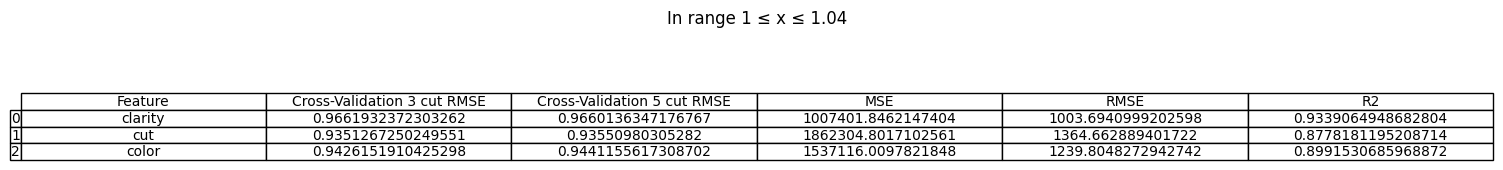

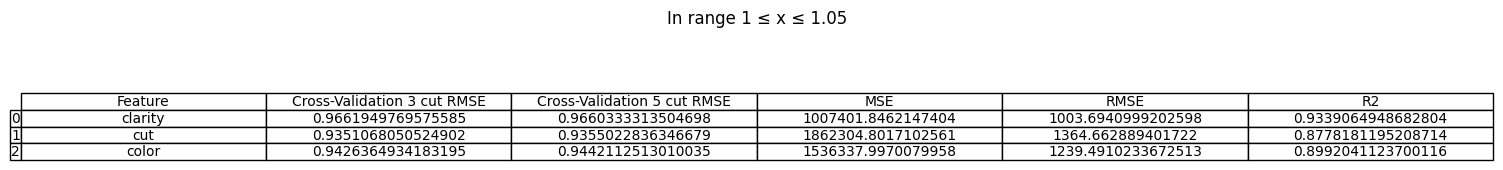

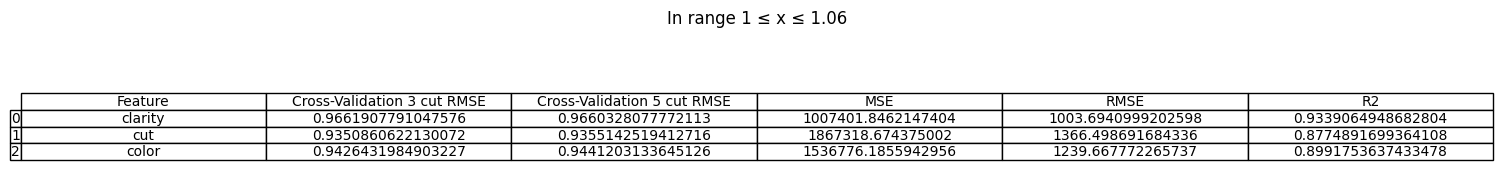

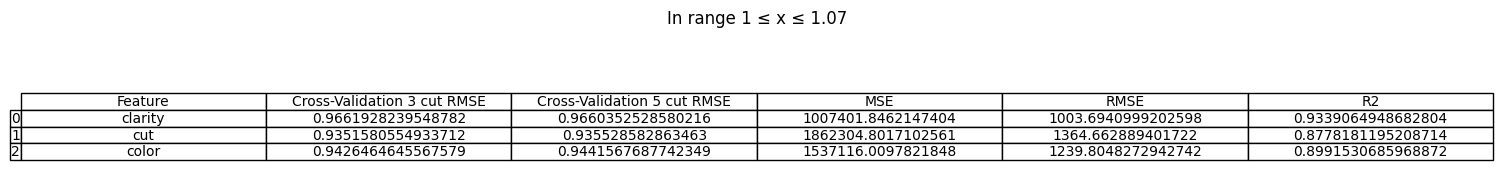

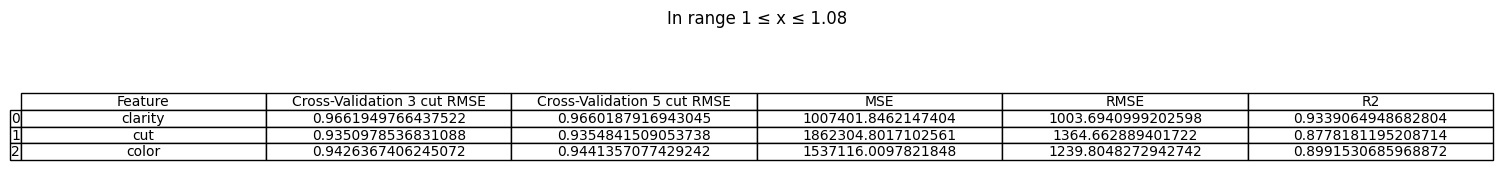

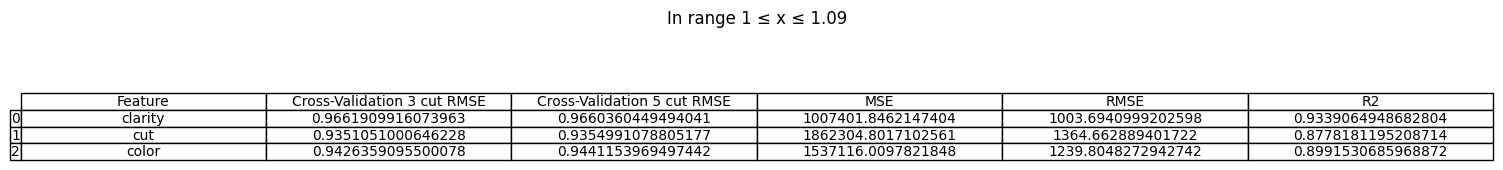

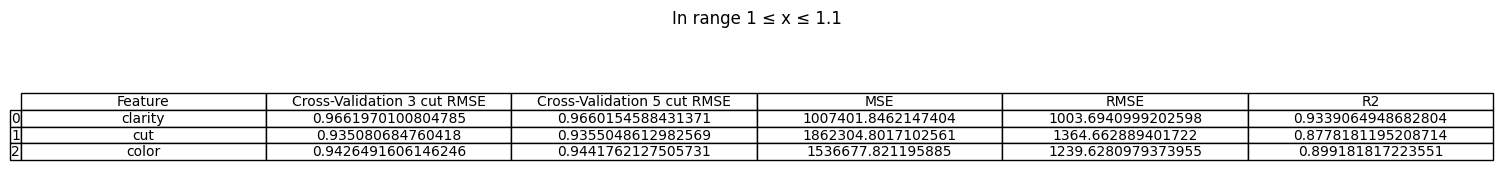

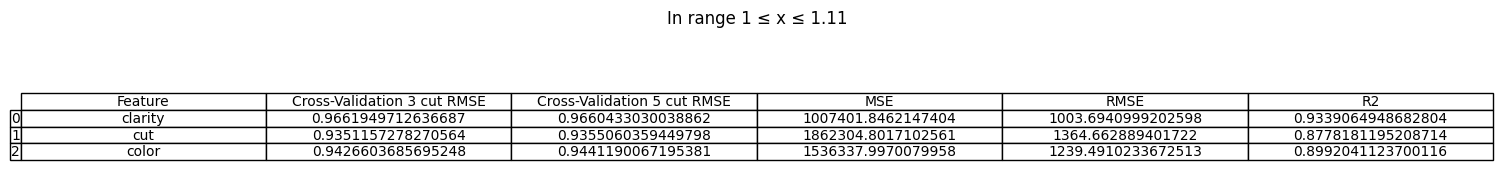

In [183]:
for i in range(len(various_range)):
  #initialize figure
  fig = plt.figure(figsize = (19, .8))
  ax = fig.add_subplot(111)

  #create table
  ax.table(cellText = various_range[i].values, rowLabels = various_range[i].index,
          colLabels = various_range[i].columns, cellLoc='center')

  #add title to table
  ax.set_title(f"In range 1 ≤ x ≤ {maxRange[i]}")

  #turn axes off
  ax.axis('off')


In [184]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [185]:
# display_side_by_side([various_range[0],various_range[1]], titles = [0,1])